Internship on Data Science and Analytics - Project 1 - Credit Score Classiﬁcation Model Development


Phase 2 : Week 2 - Model Development and Training

* Objective : Build and train the credit score classiﬁcation model.







Importing Libraries

In [3]:
import numpy as np
import pandas as pd

Loading Dataset

In [4]:
df = pd.read_csv("/content/credit.csv")
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,Good


Feature Engineering:

In [5]:
# keeping a copy of dataframe
df_copy = df

In [6]:
# Dropping Columns
columns_to_drop = ['ID','Customer_ID','Name','SSN','Occupation']
df = df.drop(columns=columns_to_drop)

# Display the DataFrame after dropping columns
print("\nDataFrame after dropping specified columns:")
df.shape


DataFrame after dropping specified columns:


(100000, 23)

In [7]:
# Convert float columns to integers
float_columns = ['Age','Num_Bank_Accounts','Num_Credit_Card','Num_of_Loan']
df[float_columns] = df[float_columns].astype(int)

In [8]:
encoding_map = {'Poor': 0, 'Standard': 1, 'Good': 2}
df['Credit_Score_Encoded'] = df['Credit_Score'].map(encoding_map)

In [9]:
df['Credit_Mix'].unique()

array(['Good', 'Standard', 'Bad'], dtype=object)

In [10]:
df['Credit_Mix'] = df['Credit_Mix'].map({'Good': 2, 'Standard': 1, 'Bad': 0})

In [11]:
df.drop(columns=['Credit_Score'], inplace=True)
df.rename(columns={'Credit_Score_Encoded': 'Credit_Score'}, inplace=True)

In [12]:
unique_values_column = df['Payment_Behaviour'].unique()
print("Unique values in the column:", unique_values_column)

Unique values in the column: ['High_spent_Small_value_payments' 'Low_spent_Large_value_payments'
 'Low_spent_Medium_value_payments' 'Low_spent_Small_value_payments'
 'High_spent_Medium_value_payments' 'High_spent_Large_value_payments']


In [13]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Payment_Behaviour'] = label_encoder.fit_transform(df['Payment_Behaviour'])

In [14]:
# Count of unique values in a column
unique_values_count = df['Payment_of_Min_Amount'].nunique()
print("Count of unique values in the column:", unique_values_count)

Count of unique values in the column: 3


In [15]:
unique_values_column = df['Payment_of_Min_Amount'].unique()
print("Unique values in the column:", unique_values_column)

Unique values in the column: ['No' 'NM' 'Yes']


In [16]:
df["Payment_of_Min_Amount"] = label_encoder.fit_transform(df["Payment_of_Min_Amount"])

In [17]:
column_name = 'Type_of_Loan'

# Get unique values and their counts
unique_values_counts = df[column_name].value_counts()

# Display unique values and counts
print("Unique values in column '{}' along with their counts:".format(column_name))
print(unique_values_counts)

Unique values in column 'Type_of_Loan' along with their counts:
No Data                                                                                                                               11408
Not Specified                                                                                                                          1408
Credit-Builder Loan                                                                                                                    1280
Personal Loan                                                                                                                          1272
Debt Consolidation Loan                                                                                                                1264
                                                                                                                                      ...  
Not Specified, Mortgage Loan, Auto Loan, and Payday Loan                                        

In [18]:
df.drop(columns=['Type_of_Loan'], inplace=True)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     100000 non-null  int64  
 1   Age                       100000 non-null  int64  
 2   Annual_Income             100000 non-null  float64
 3   Monthly_Inhand_Salary     100000 non-null  float64
 4   Num_Bank_Accounts         100000 non-null  int64  
 5   Num_Credit_Card           100000 non-null  int64  
 6   Interest_Rate             100000 non-null  float64
 7   Num_of_Loan               100000 non-null  int64  
 8   Delay_from_due_date       100000 non-null  float64
 9   Num_of_Delayed_Payment    100000 non-null  float64
 10  Changed_Credit_Limit      100000 non-null  float64
 11  Num_Credit_Inquiries      100000 non-null  float64
 12  Credit_Mix                100000 non-null  int64  
 13  Outstanding_Debt          100000 non-null  fl

In [20]:
df.head()

,Month,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,1,23,19114.12,1824.843333,3,4,3.0,4,3.0,7.0,...,2,809.98,26.822620,265.0,1,49.574949,21.46538,2,312.494089,2
1,2,23,19114.12,1824.843333,3,4,3.0,4,3.0,4.0,...,2,809.98,31.944960,266.0,1,49.574949,21.46538,3,284.629162,2
2,3,23,19114.12,1824.843333,3,4,3.0,4,3.0,7.0,...,2,809.98,28.609352,267.0,1,49.574949,21.46538,4,331.209863,2
3,4,23,19114.12,1824.843333,3,4,3.0,4,5.0,4.0,...,2,809.98,31.377862,268.0,1,49.574949,21.46538,5,223.451310,2
4,5,23,19114.12,1824.843333,3,4,3.0,4,6.0,4.0,...,2,809.98,24.797347,269.0,1,49.574949,21.46538,1,341.489231,2


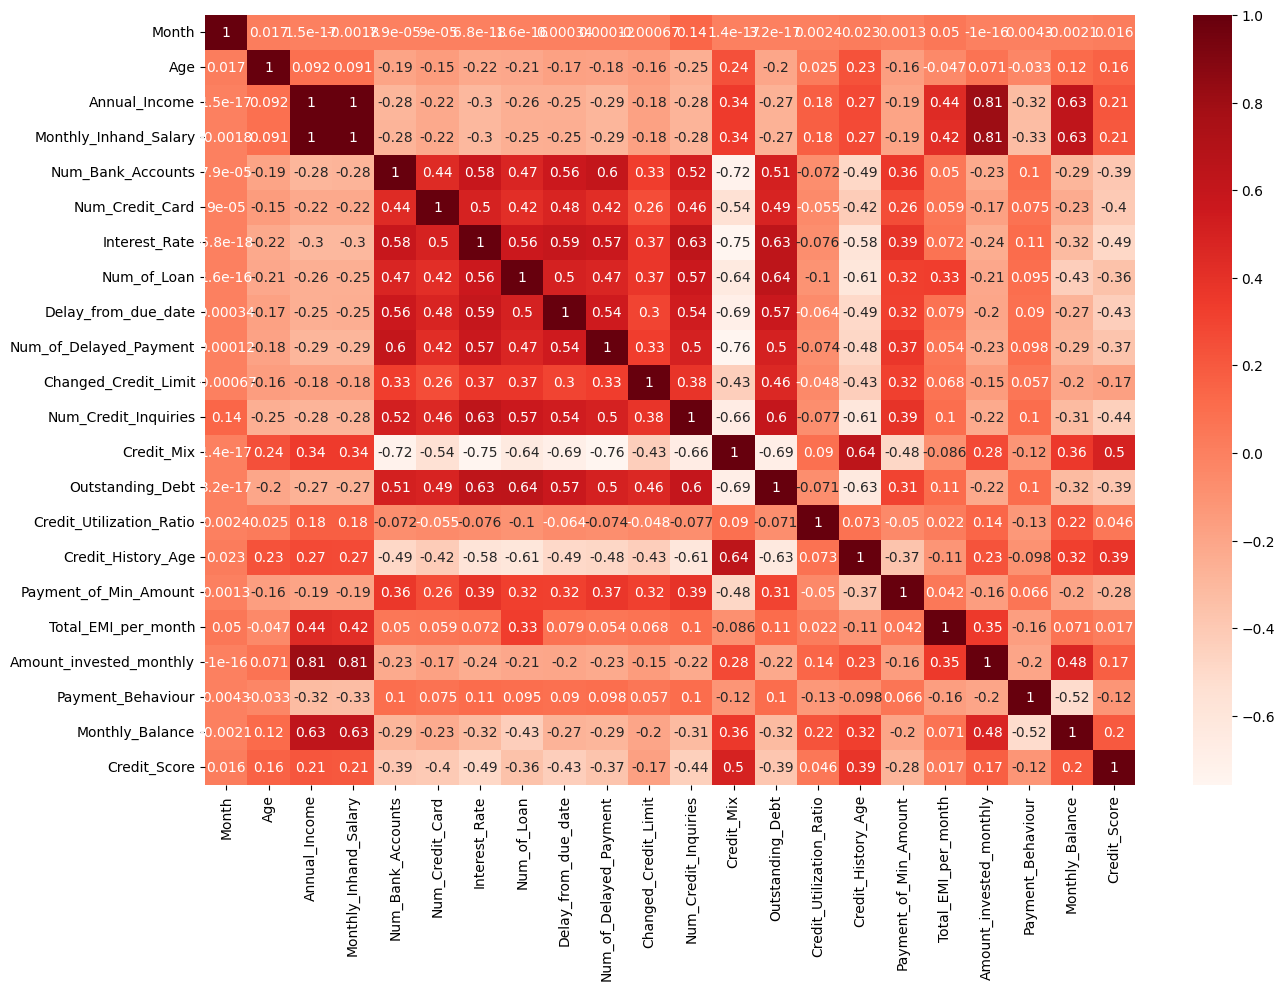

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [24]:
# Selecting features with positive correlation
X = df[['Age','Annual_Income', 'Monthly_Inhand_Salary', 'Credit_Mix', 'Monthly_Balance','Credit_History_Age','Amount_invested_monthly','Monthly_Balance']]


In [25]:
X

,Age,Annual_Income,Monthly_Inhand_Salary,Credit_Mix,Monthly_Balance,Credit_History_Age,Amount_invested_monthly,Monthly_Balance
0,23,19114.12,1824.843333,2,312.494089,265.0,21.465380,312.494089
1,23,19114.12,1824.843333,2,284.629162,266.0,21.465380,284.629162
2,23,19114.12,1824.843333,2,331.209863,267.0,21.465380,331.209863
3,23,19114.12,1824.843333,2,223.451310,268.0,21.465380,223.451310
4,23,19114.12,1824.843333,2,341.489231,269.0,21.465380,341.489231
...,...,...,...,...,...,...,...,...
99995,25,39628.99,3359.415833,2,479.866228,378.0,24.028477,479.866228
99996,25,39628.99,3359.415833,2,496.651610,379.0,24.028477,496.651610
99997,25,39628.99,3359.415833,2,516.809083,380.0,24.028477,516.809083
99998,25,39628.99,3359.415833,2,319.164979,381.0,24.028477,319.164979


In [26]:
y = df['Credit_Score']

In [27]:
y

0        2
1        2
2        2
3        2
4        2
        ..
99995    0
99996    0
99997    0
99998    1
99999    0
Name: Credit_Score, Length: 100000, dtype: int64

In [28]:
from sklearn.model_selection import train_test_split
X.shape

(100000, 8)

In [29]:
y.shape

(100000,)

In [30]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

In [31]:
print("Training set shape:", X_train.shape, y_train.shape)

Training set shape: (70000, 8) (70000,)


In [32]:
# Spliting the temporary set into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Print the shapes of the resulting sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Training set shape: (70000, 8) (70000,)
Validation set shape: (15000, 8) (15000,)
Test set shape: (15000, 8) (15000,)


Model Building

 1 .Random Forest:

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

# Building Model
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Evaluate Model
y_pred = rf_classifier.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.76      0.77      4367
           1       0.79      0.81      0.80      7946
           2       0.75      0.73      0.74      2687

    accuracy                           0.78     15000
   macro avg       0.77      0.76      0.77     15000
weighted avg       0.78      0.78      0.78     15000



*   Overall accuracy of the model is **0.78**

2. Decision Tree:

In [37]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

# Model Evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.73      0.73      4367
           1       0.77      0.77      0.77      7946
           2       0.71      0.71      0.71      2687

    accuracy                           0.75     15000
   macro avg       0.74      0.74      0.74     15000
weighted avg       0.75      0.75      0.75     15000





*   accuracy of the model is **0.75**



3 . K-Nearest Neighbors (KNN):

In [38]:
from sklearn.neighbors import KNeighborsClassifier

k = 3  # Number of neighbors
clf = KNeighborsClassifier(n_neighbors=k)
clf.fit(X_train, y_train)

# predictions on the testing data
y_pred = clf.predict(X_test)

# Model Evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.70      0.68      4367
           1       0.73      0.72      0.73      7946
           2       0.64      0.58      0.61      2687

    accuracy                           0.69     15000
   macro avg       0.67      0.67      0.67     15000
weighted avg       0.69      0.69      0.69     15000



*   accuracy of the model is **0.69**

Models and their accuracy



1.   Random Forest : **0.78**
2.   Decision Tree: 0.75
3.   K-Nearest Neighbors (KNN): 0.69




